In [ ]:
# import libraries
import numpy as np
import torch

import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
cdata = torchvision.datasets.CIFAR10(root = 'cifar10', download = True)
print(cdata)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [ ]:
# shape of the dataset
print(cdata.data.shape)

# the unique catergories
print(cdata.classes)

# targets is a list of targets converted to ints
print(len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


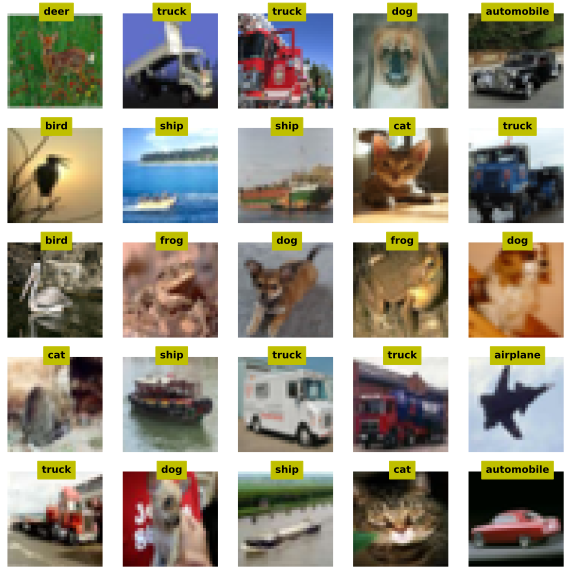

In [ ]:
# inspect few random images
fig,axs = plt.subplots(5,5, figsize = (10, 10))

for ax in axs.flatten():

    # select a random picture
    randidx = np.random.choice(len(cdata.targets))

    # extract the image
    pic = cdata.data[randidx, :, :, :]
    label = cdata.classes[cdata.targets[randidx]]

    ax.imshow(pic)
    ax.text(16, 0,
            label, ha = 'center',
            fontweight = 'bold',
            color = 'k', backgroundcolor = 'y')
    ax.axis('off')

In [ ]:
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32 * 4),
                 T.Grayscale(num_output_channels = 1)])

# include the transform in the dataset
cdata.transform = Ts

# we can also apply the transform immediately when loading in the data
# cdata = torch.vision.datasets.CIFAR10(root = 'cifar10', download = True, transform = Ts)

print(cdata.data[123, :, :, :].shape)

(32, 32, 3)


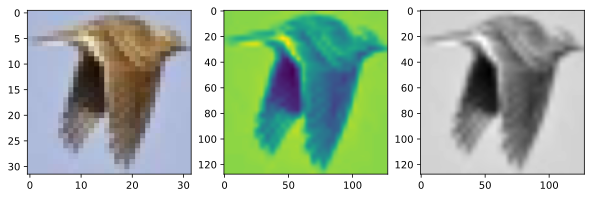

In [ ]:
# apply the transform

# option 1: apply the transform "externally" to an image
img1 = Ts(cdata.data[123, :, :, :])

# option 2: embedded transform
img2 = cdata.transform(cdata.data[123, :, :, :])

fig, ax = plt.subplots(1, 3, figsize = (10, 3))
ax[0].imshow(cdata.data[123, :, :, :])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2), cmap = 'gray')

plt.show()

In [ ]:
img1

tensor([[[0.7176, 0.7176, 0.7178,  ..., 0.7232, 0.7232, 0.7232],
         [0.7176, 0.7176, 0.7178,  ..., 0.7232, 0.7232, 0.7232],
         [0.7176, 0.7176, 0.7178,  ..., 0.7236, 0.7236, 0.7236],
         ...,
         [0.7255, 0.7255, 0.7255,  ..., 0.7245, 0.7245, 0.7245],
         [0.7257, 0.7257, 0.7257,  ..., 0.7245, 0.7245, 0.7245],
         [0.7257, 0.7257, 0.7257,  ..., 0.7245, 0.7245, 0.7245]]])